In [2]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
iris_cols = ['SepalLengthCm', 'SepalWidthCm','PetalLengthCm',
             'PetalWidthCm','Species']

iris = pd.read_csv("iris.txt", sep=',', names=iris_cols)
             

iris.head()
%matplotlib inline

In [3]:
# Let's see how many examples we have of each species
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

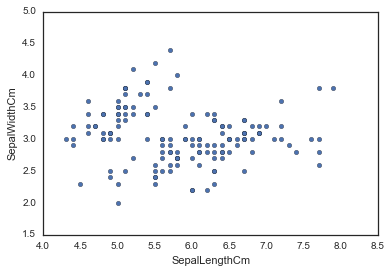

In [4]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x='SepalLengthCm', y = 'SepalWidthCm')

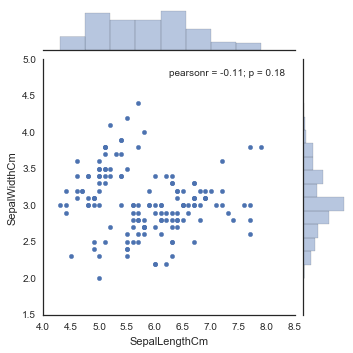

In [5]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x='SepalLengthCm', y = 'SepalWidthCm', data=iris, size=5)

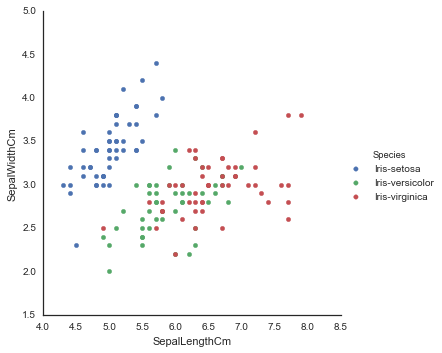

In [6]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(iris, hue='Species', size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm",) \
   .add_legend()

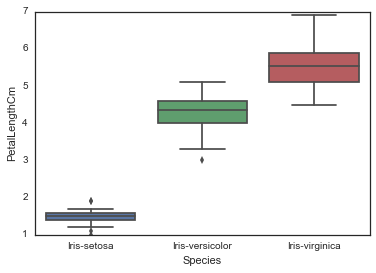

In [7]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)

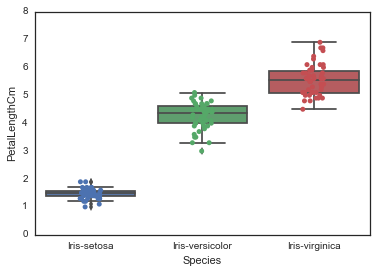

In [41]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Species", y = "PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y = "PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

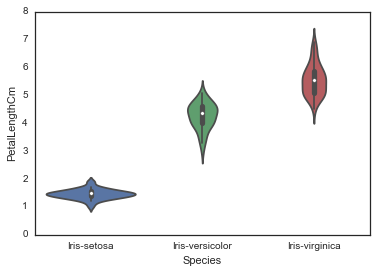

In [42]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="Species", y = "PetalLengthCm", data=iris, size=6)

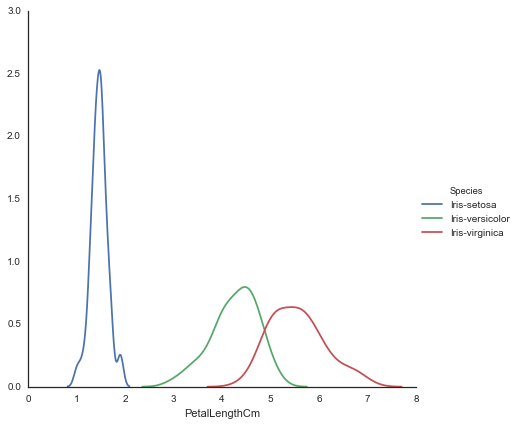

In [43]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

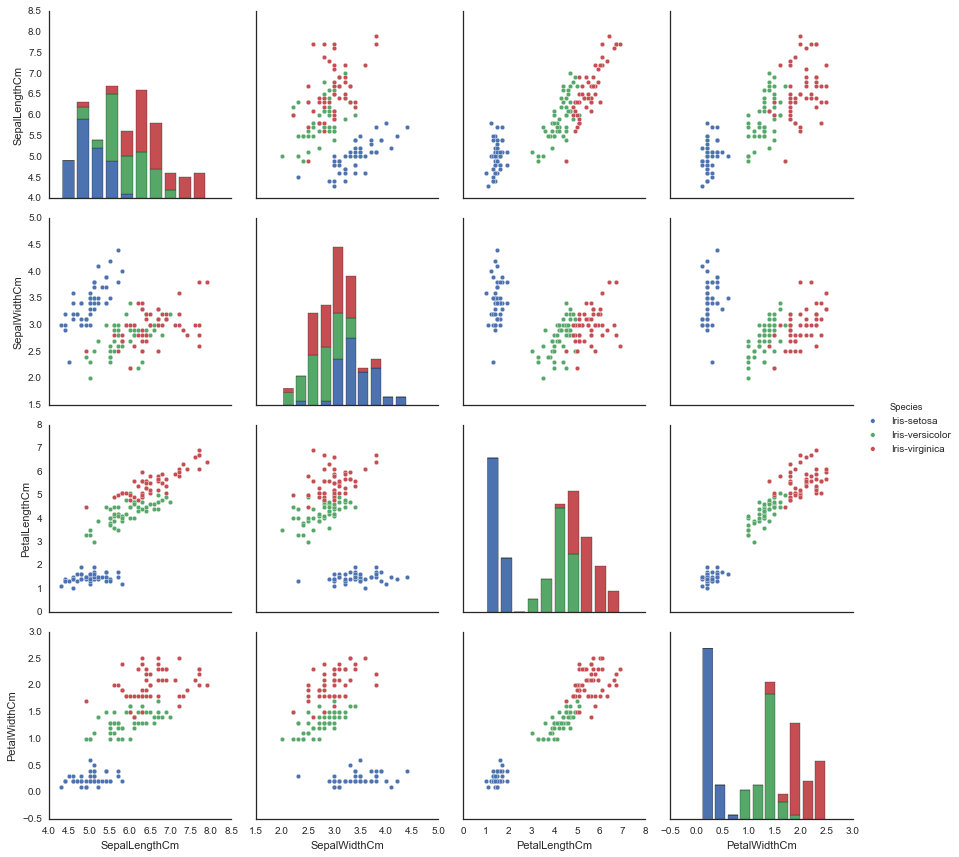

In [46]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separataed from the other
# two across all feature combinations
sns.pairplot(iris,hue="Species", size=3)

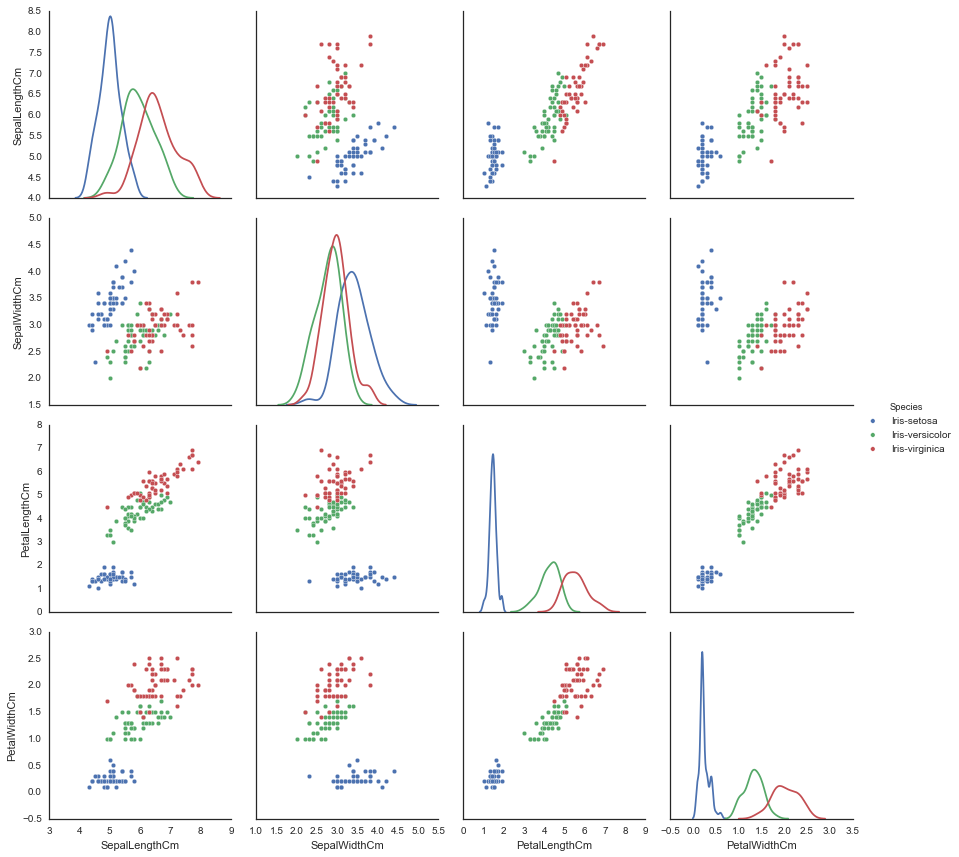

In [47]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(iris, hue="Species", size=3, diag_kind="kde")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001417E198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000013AD0C50>]], dtype=object)

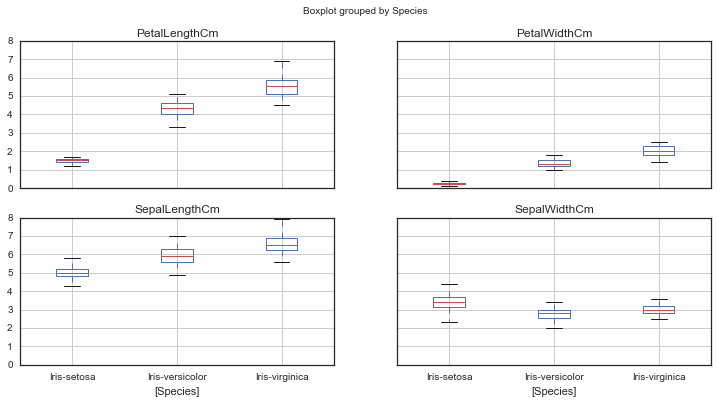

In [52]:
# Now that we've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
iris.boxplot(by="Species", figsize=(12, 6))

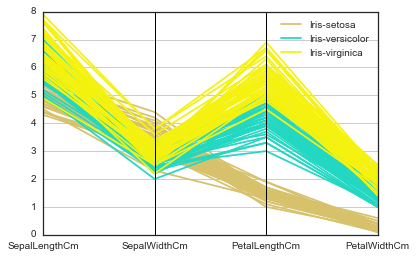

In [53]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample.

from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris, "Species")

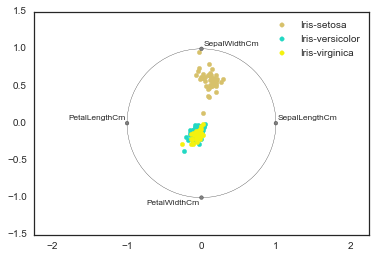

In [54]:
# A final multivariate visualization tehnique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(iris, "Species")

In [10]:
foodfacts = pd.read_csv("FoodFacts.csv")
foodfacts.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,caffeine_100g,taurine_100g,ph_100g,fruits_vegetables_nuts_100g,collagen_meat_protein_ratio_100g,cocoa_100g,chlorophyl_100g,carbon_footprint_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
0,000000000000012866,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,1447004364,2015-11-08T17:39:24Z,1447004364,2015-11-08T17:39:24Z,Poêlée à la sarladaise,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000024600,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000036252,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1422221855,2015-01-25T21:37:35Z,Lion Peanut x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000039259,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1422221926,2015-01-25T21:38:46Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000039529,http://world-en.openfoodfacts.org/product/0000...,teolemon,1420147051,2015-01-01T21:17:31Z,1439141740,2015-08-09T17:35:40Z,Pack de 2 Twix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
foodfacts["nutrition_score_uk_100g"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10       10.0
11       10.0
12        NaN
13        2.0
14        NaN
15        NaN
16        2.0
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22       14.0
23        6.0
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29       13.0
         ... 
65473    17.0
65474     6.0
65475     NaN
65476     NaN
65477     NaN
65478     NaN
65479     NaN
65480     NaN
65481     NaN
65482     NaN
65483     NaN
65484     NaN
65485     NaN
65486     NaN
65487     NaN
65488     NaN
65489     NaN
65490     NaN
65491     NaN
65492    -4.0
65493     NaN
65494     NaN
65495     NaN
65496     NaN
65497     NaN
65498     NaN
65499     0.0
65500     NaN
65501     NaN
65502     NaN
Name: nutrition_score_uk_100g, dtype: float64

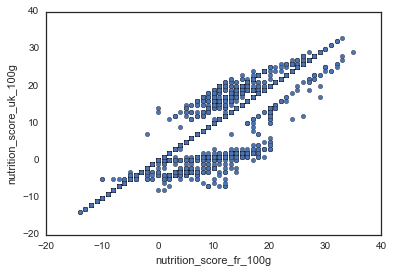

In [12]:
foodfacts.plot(kind="scatter", x='nutrition_score_fr_100g', y = 'nutrition_score_uk_100g')

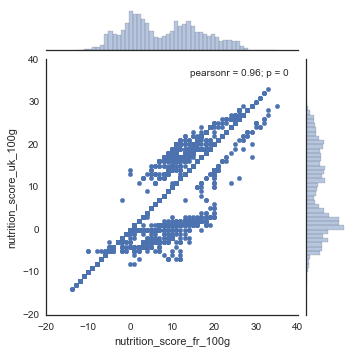

In [13]:
sns.jointplot(x='nutrition_score_fr_100g', y = 'nutrition_score_uk_100g', data=foodfacts, size=5)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [51]:
col_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
Id = list(range(1,151))
iris = pd.read_csv("iris.txt", names=col_names)
iris.insert(0,"Id",Id)
iris.head()

,Id,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

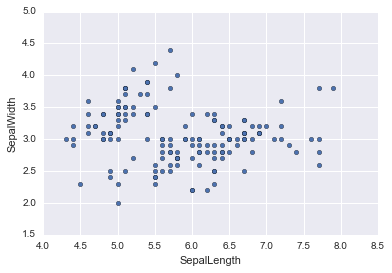

In [19]:
iris.plot(kind="scatter", x = 'SepalLength', y = 'SepalWidth')

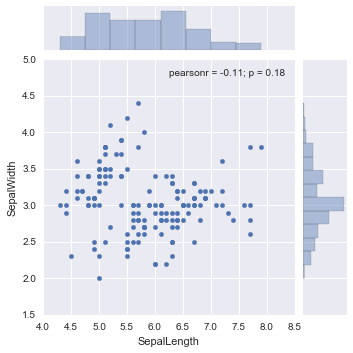

In [20]:
sns.jointplot(x = 'SepalLength', y = 'SepalWidth', data = iris, size=5)

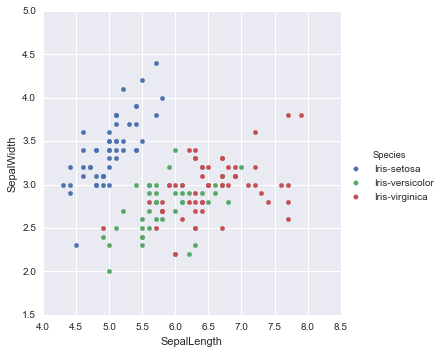

In [23]:
#Hue will diferentiate and collapse the columns from above into one
sns.FacetGrid(iris, hue="Species", size=5) \
   .map(plt.scatter, "SepalLength", "SepalWidth") \
   .add_legend()

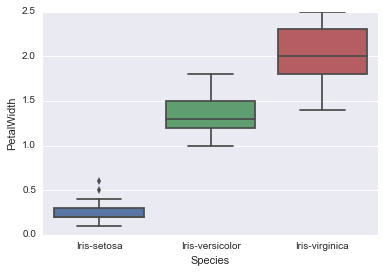

In [24]:
sns.boxplot(x='Species',
            y = "PetalWidth",
            data = iris)

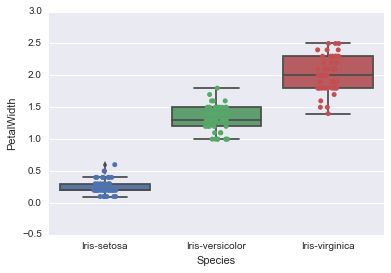

In [27]:
ax = sns.boxplot(x = "Species",
                y = "PetalWidth",
                data = iris)
ax = sns.stripplot(x= "Species",
                  y = "PetalWidth",
                  data = iris,
                   jitter=True,
                  edgecolor="gray")

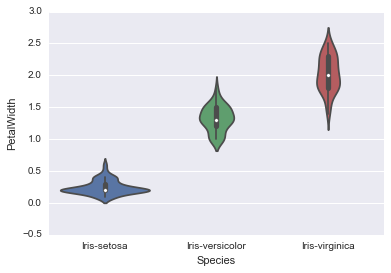

In [28]:
sns.violinplot(x="Species",
               y = "PetalWidth",
               data = iris,
               size=6)

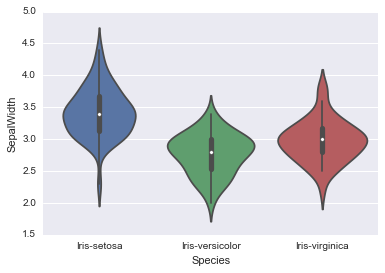

In [29]:
sns.violinplot(x="Species",
               y = "SepalWidth",
               data = iris,
               size=6)

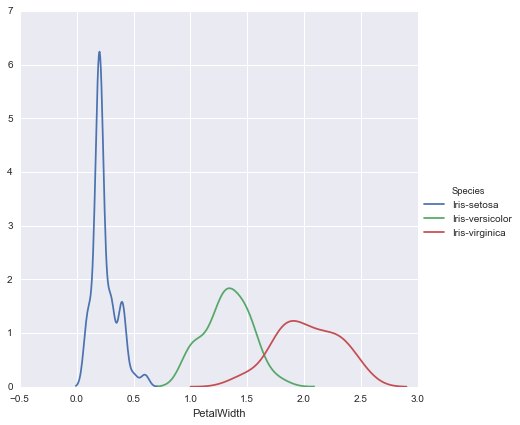

In [31]:
#Kernel density estimate 
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalWidth") \
    .add_legend()

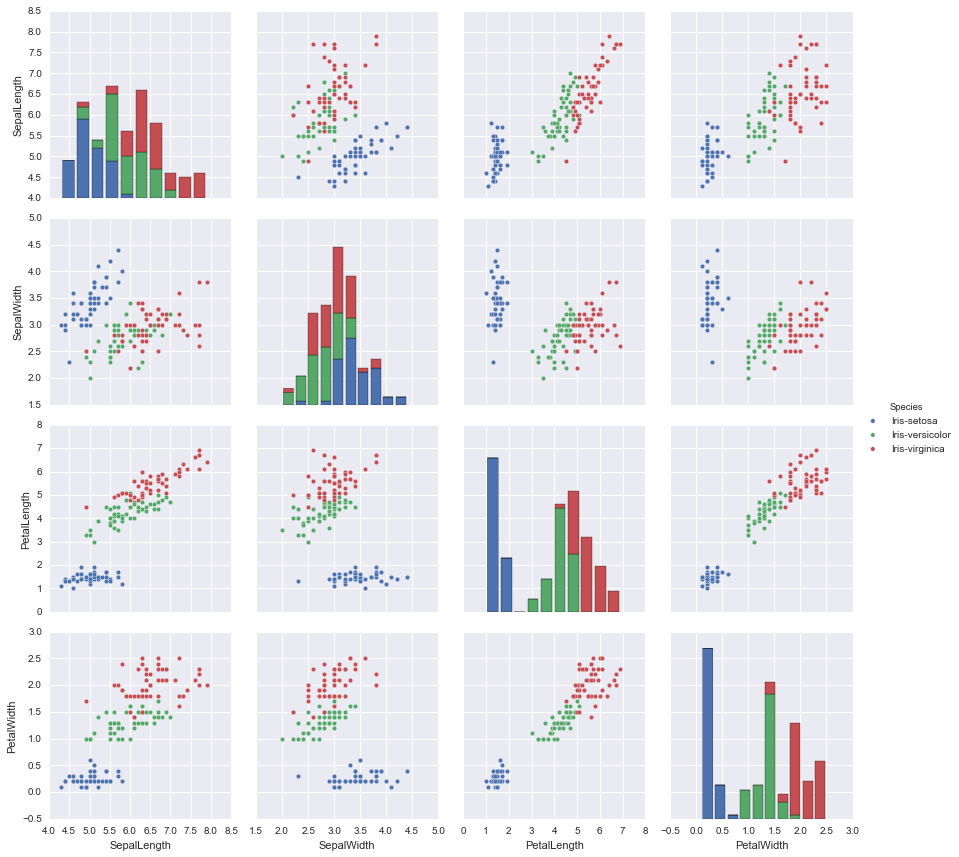

In [52]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

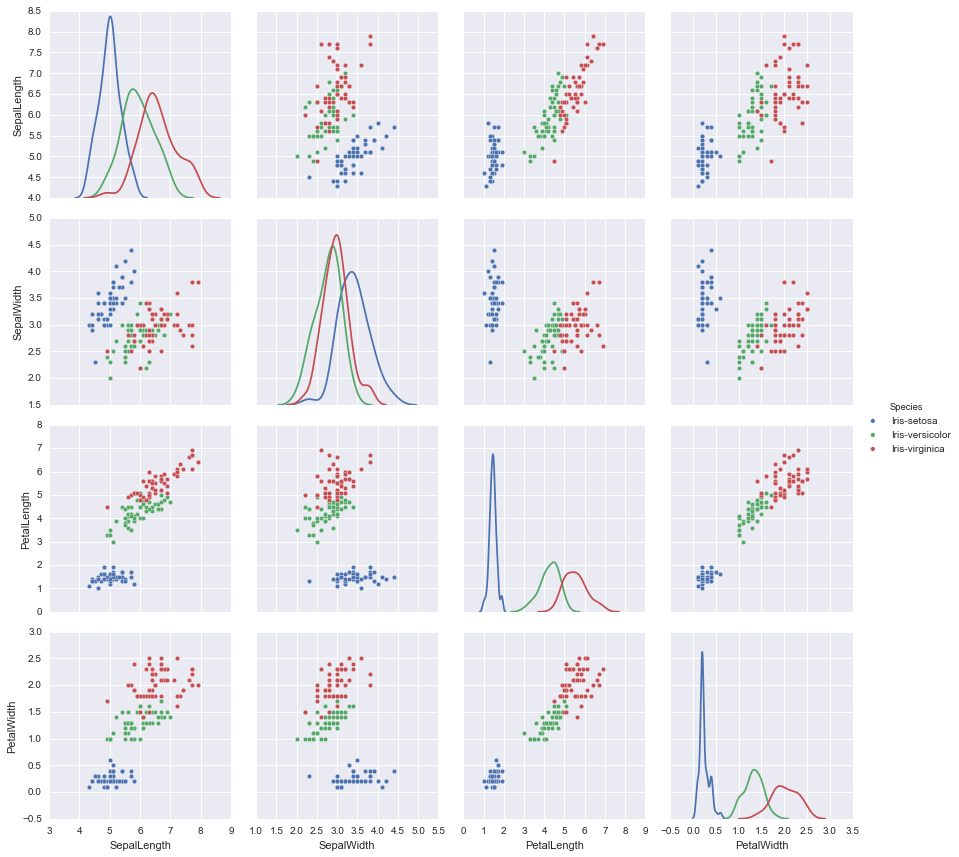

In [53]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")

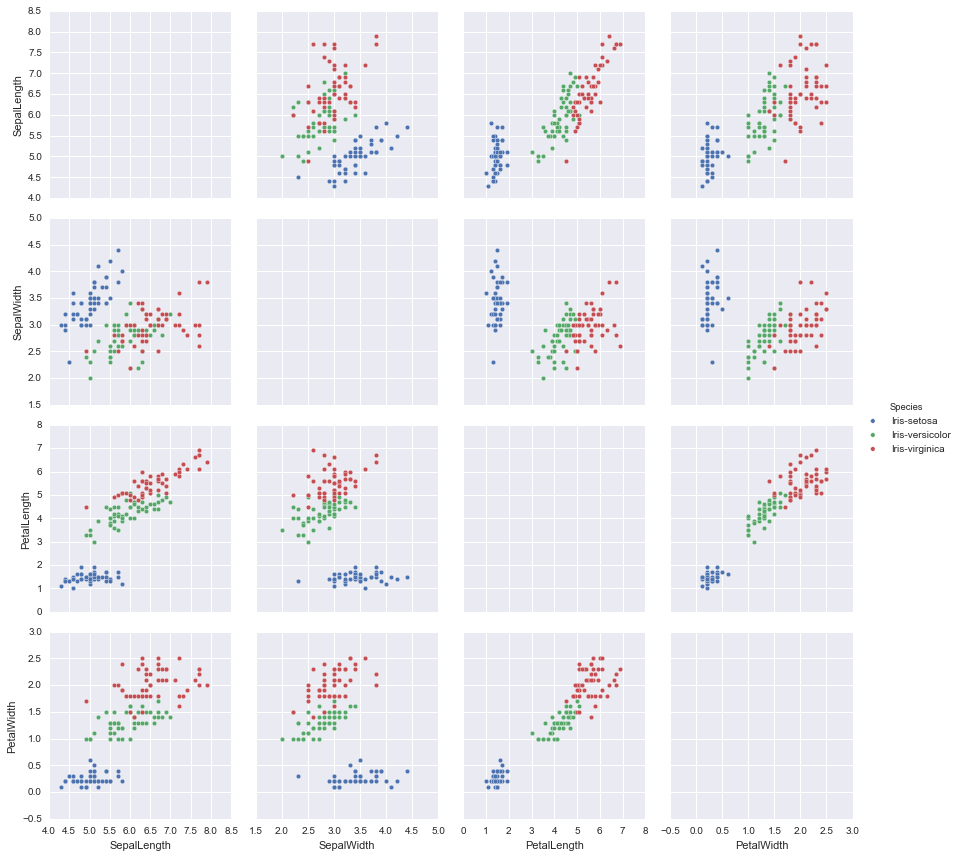

In [54]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="regular")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015819320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000015BBB320>]], dtype=object)

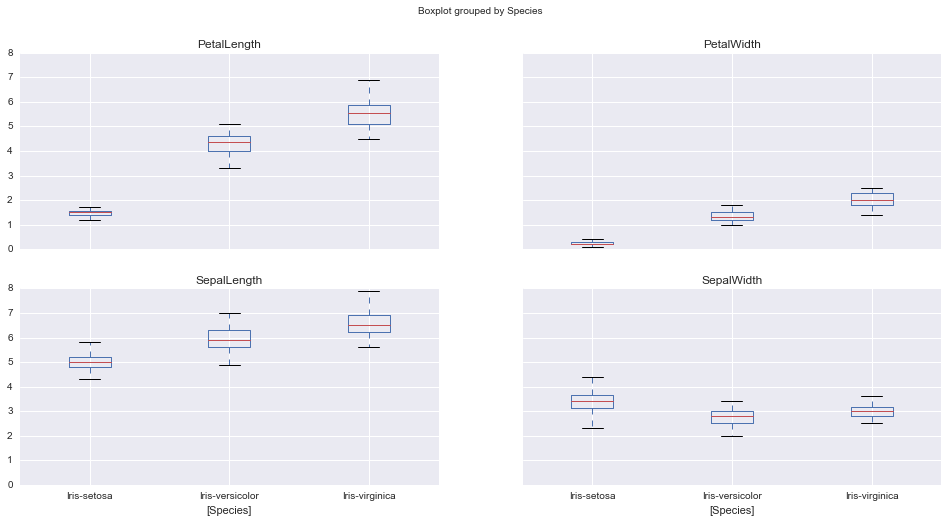

In [59]:
iris.drop("Id", axis=1) \
    .boxplot(by = "Species", figsize=(16,8))